In [100]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

lots = pd.read_csv('../clean-files/artsy_auctions_artworks_info.csv')
lots.columns

Index(['url', 'img_url', 'Price', 'Artist', 'Artist_url', 'Title',
       'Pre-sale estimate', 'Medium', 'Sale Date', 'Auction house',
       'Price_USD', 'Height (cm)', 'Width (cm)', 'Area (cm²)', 'Price_fix',
       'Price_unit', 'Sale details', 'Price (USD)', 'Price (USD / cm²)',
       'Price (USD / cm)', 'Medium_type', 'Sold', 'Year', 'Year of sale'],
      dtype='object')

In [101]:
prints = lots[lots['Medium_type'] == 'print']
paintings = lots[lots['Medium_type'] == 'painting']
drawings = lots[lots['Medium_type'] == 'drawing']

print('Prints: ', len(prints))
print('Paintings: ', len(paintings))
print('Drawings: ', len(drawings))

Prints:  10149
Paintings:  3394
Drawings:  2860


In [102]:
# Median price of each medium
prints_median_price = prints['Price (USD)'].median()
paintings_median_price = paintings['Price (USD)'].median()
drawings_median_price = drawings['Price (USD)'].median()
# Weight of each medium
prints_weight = prints_median_price / (prints_median_price + paintings_median_price + drawings_median_price)
paintings_weight = paintings_median_price / (prints_median_price + paintings_median_price + drawings_median_price)
drawings_weight = drawings_median_price / (prints_median_price + paintings_median_price + drawings_median_price)

print('Prints weight: ', prints_weight.round(2))
print('Paintings weight: ', paintings_weight.round(2))
print('Drawings weight: ', drawings_weight.round(2))

Prints weight:  0.04
Paintings weight:  0.51
Drawings weight:  0.44


In [103]:
artists_names = lots['Artist'].unique()

artists_indices = pd.DataFrame()

for artist_name in artists_names:
    print(artist_name)
    artist_lots = lots[lots['Artist'] == artist_name]

    # ignore top and bottom 5% of lots by 'Price (USD / cm)'
    percentiles = artist_lots['Price (USD / cm)'].quantile([0.05, 0.95])
    artist_lots = artist_lots[(artist_lots['Price (USD / cm)'] > percentiles[0.05]) & (artist_lots['Price (USD / cm)'] < percentiles[0.95])]
    artist_lots = artist_lots[artist_lots['Price (USD / cm)'] > 0]

    # artist dataframe: index: years (from first to last lot), columns: prints_median_price, paintings_median_price, drawings_median_price
    artist_df = pd.DataFrame(columns=['prints_median_price', 'paintings_median_price', 'drawings_median_price'])
    artist_df['prints_median_price'] = prints[prints['Artist'] == artist_name].groupby('Year of sale')['Price (USD)'].median()
    artist_df['paintings_median_price'] = paintings[paintings['Artist'] == artist_name].groupby('Year of sale')['Price (USD)'].median()
    artist_df['drawings_median_price'] = drawings[drawings['Artist'] == artist_name].groupby('Year of sale')['Price (USD)'].median()

    artist_df = artist_df.fillna(0)

    artist_df['prints_weight'] = np.where(artist_df['prints_median_price'] == 0, 0, prints_weight)
    artist_df['paintings_weight'] = np.where(artist_df['paintings_median_price'] == 0, 0, paintings_weight)
    artist_df['drawings_weight'] = np.where(artist_df['drawings_median_price'] == 0, 0, drawings_weight)

    artist_df['total_weight'] = artist_df['prints_weight'] + artist_df['paintings_weight'] + artist_df['drawings_weight']

    artist_df['Price Index'] = (
        artist_df['prints_weight'] * artist_df['prints_median_price'] +
        artist_df['paintings_weight'] * artist_df['paintings_median_price'] +
        artist_df['drawings_weight'] * artist_df['drawings_median_price']
    ) / artist_df['total_weight']

    # apply 3-year moving average
    artist_df['Price Index'] = artist_df['Price Index'].rolling(window=3).mean()

    # Assign the relevant portion of 'Price Index' to the corresponding column in 'artists_indices'
    artists_indices[artist_name] = artist_df['Price Index']

artists_indices.round(2)

Marc Chagall
Emiliano Di Cavalcanti
Vicente do Rego Monteiro
Cândido Portinari
Victor Vasarely


,Marc Chagall,Emiliano Di Cavalcanti,Vicente do Rego Monteiro,Cândido Portinari,Victor Vasarely
Year of sale,,,,,
1992,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN
1995,193107.61,NaN,NaN,NaN,NaN
1996,179753.97,NaN,NaN,NaN,NaN
1997,182741.38,NaN,NaN,NaN,NaN
1998,172215.31,NaN,NaN,NaN,NaN
1999,198333.26,NaN,NaN,NaN,NaN
2000,193846.02,NaN,NaN,NaN,NaN
2001,231776.14,NaN,NaN,NaN,NaN


In [104]:
# year of sale as index
artists_indices.to_csv('./models/artsy_auctions_artists_indices.csv')

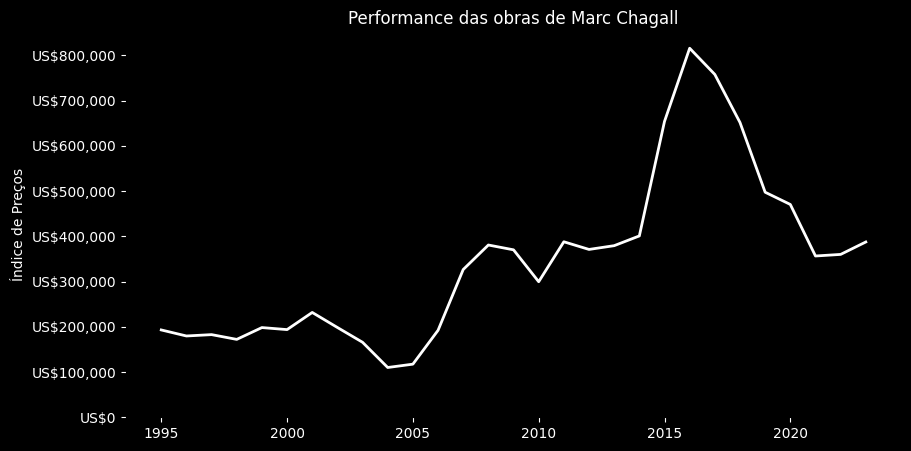

In [105]:
## Getting indices chart

def get_line_chart(data):
    fig, ax = plt.subplots(figsize=(10, 5))

    # index as int
    data.index = data.index.astype(int)
    
    ax.set_ylabel('Índice de Preços')
    ax.plot(data, color='white', label='Portfolio Value (USD)', linewidth=2)
    
    # Explicitly set the title
    ax.set_title('Performance das obras de Marc Chagall', color='white')

    ax.set_ylim(bottom=0)

    ax.xaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    
    # Set the y-axis color to white
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='y', colors='white')

    formatter = ticker.StrMethodFormatter('US${x:,.0f}')
    ax.yaxis.set_major_formatter(formatter)

    # Set black background
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    ax.legend().set_visible(False)

    # Display the plot using plt.show()
    plt.show()

# Assuming artists_indices is your DataFrame
get_line_chart(artists_indices['Marc Chagall'])

In [165]:
# Getting performance metrics

def get_performance(price_index):
    metrics_df = pd.DataFrame(index=['Total Return', 'CAGR', 'Volatility', 'Sharpe Ratio'], columns=['Metric Value'])

    # Calculate Total Return
    total_return = (price_index.iloc[-1] / price_index.iloc[0]) - 1
    metrics_df.loc['Total Return', 'Metric Value'] = total_return

    # Calculate CAGR
    years = len(price_index)
    cagr = ((price_index.iloc[-1] / price_index.iloc[0]) ** (1 / years)) - 1
    metrics_df.loc['CAGR', 'Metric Value'] = cagr

    # Calculate Volatility (assuming daily returns)
    daily_returns = price_index.pct_change().dropna()
    volatility = daily_returns.std()# * np.sqrt(252)  # Assuming 252 trading days in a year
    metrics_df.loc['Volatility', 'Metric Value'] = volatility

    # Calculate Sharpe Ratio
    sharpe_ratio = cagr / volatility
    metrics_df.loc['Sharpe Ratio', 'Metric Value'] = sharpe_ratio

    return metrics_df

df = artists_indices['Marc Chagall'][2:]
performance_df = get_performance(df)
performance_df

,Metric Value
Total Return,1.007052
CAGR,0.024314
Volatility,0.259458
Sharpe Ratio,0.09371


In [140]:
chagall = pd.read_csv('chagall.csv')

# get dataframe with sales count
chagall_sales = pd.DataFrame(chagall.groupby('Year of sale')['Price (USD)'].count())

# rename index to Year and column to Sales Count
chagall_sales.index.names = ['Year']
chagall_sales.columns = ['Sales Count']


chagall_index = artists_indices['Marc Chagall'][2:]
chagall_sales = chagall_sales[9:]

chagall_sales['Price Index'] = chagall_index

chagall_sales['Price Index'] = chagall_sales['Price Index'] / chagall_sales['Price Index'].iloc[0] *100

chagall_sales

,Sales Count,Price Index
Year,,
1995,55,100.000000
1996,180,93.084871
1997,309,94.631888
1998,345,89.181005
1999,296,102.706082
2000,241,100.382381
2001,242,120.024342
2002,390,102.818517
2003,349,85.863141


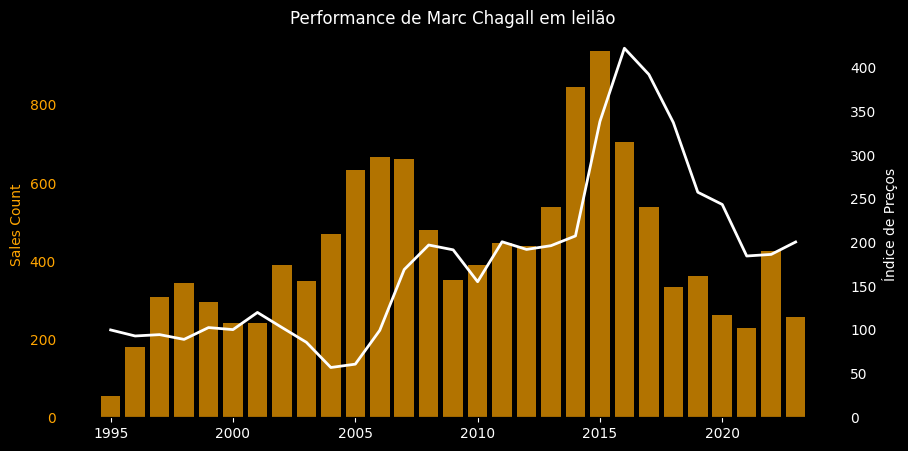

In [162]:
import matplotlib.pyplot as plt

def get_line_chart(data, ylabel='Índice de Preços', title='Performance de Marc Chagall em leilão'):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    color1 = 'orange'  # Escolha uma cor para o Total de Vendas
    ax1.set_ylabel('Sales Count', color=color1)
    ax1.bar(data.index.astype(int), data.iloc[:, 1], color=color1, label='Quantidade de vendas', alpha=0.7)
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'white'
    ax2.set_ylabel(ylabel, color=color2)
    ax2.plot(data.index.astype(int), data.iloc[:, 0], color=color2, label='Índice de Preço', linewidth=2)
    ax2.tick_params(axis='y', labelcolor=color2)

    ax1.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)

    ax1.xaxis.label.set_color('white')
    ax1.tick_params(axis='x', colors='white')

    # Defina a cor de fundo
    fig.patch.set_facecolor('black')
    ax1.set_facecolor('black')
    ax2.set_facecolor('black')

    # Defina o título
    ax1.set_title(title, color='white')

    # Exiba a legenda
    ax1.legend().set_visible(False)

    # Exiba o gráfico
    plt.show()

# Supondo que chagall_sales seja o seu DataFrame com as colunas 'Price Index' e 'Sales Count'
get_line_chart(chagall_sales[['Price Index', 'Sales Count']])
